# Before your start:
- Read the README.md file
- Comment as much as you can and use the resources in the README.md file
- Happy learning!

In [2]:
# Import your libraries:

%matplotlib inline

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
def snake_columns(data): 
    data.columns = [column.lower().replace(' ', '_') for column in data.columns]

In this lab, we will explore a dataset that describes websites with different features and labels them either benign or malicious . We will use supervised learning algorithms to figure out what feature patterns malicious websites are likely to have and use our model to predict malicious websites.

# Challenge 1 - Explore The Dataset

Let's start by exploring the dataset. First load the data file:

In [5]:
websites = pd.read_csv(r"C:\Users\enrik\Desktop\classification_lab\lab-supervised-learning\data\website.csv")

#### Explore the data from an bird's-eye view.

You should already been very familiar with the procedures now so we won't provide the instructions step by step. Reflect on what you did in the previous labs and explore the dataset.

Things you'll be looking for:

* What the dataset looks like?
* What are the data types?
* Which columns contain the features of the websites?
* Which column contains the feature we will predict? What is the code standing for benign vs malicious websites?
* Do we need to transform any of the columns from categorical to ordinal values? If so what are these columns?

Feel free to add additional cells for your explorations. Make sure to comment what you find out.

In [7]:
# Your code here
websites

,URL,URL_LENGTH,NUMBER_SPECIAL_CHARACTERS,CHARSET,SERVER,CONTENT_LENGTH,WHOIS_COUNTRY,WHOIS_STATEPRO,WHOIS_REGDATE,WHOIS_UPDATED_DATE,...,DIST_REMOTE_TCP_PORT,REMOTE_IPS,APP_BYTES,SOURCE_APP_PACKETS,REMOTE_APP_PACKETS,SOURCE_APP_BYTES,REMOTE_APP_BYTES,APP_PACKETS,DNS_QUERY_TIMES,Type
0,M0_109,16,7,iso-8859-1,nginx,263.0,NaN,NaN,10/10/2015 18:21,NaN,...,0,2,700,9,10,1153,832,9,2.0,1
1,B0_2314,16,6,UTF-8,Apache/2.4.10,15087.0,NaN,NaN,NaN,NaN,...,7,4,1230,17,19,1265,1230,17,0.0,0
2,B0_911,16,6,us-ascii,Microsoft-HTTPAPI/2.0,324.0,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0.0,0
3,B0_113,17,6,ISO-8859-1,nginx,162.0,US,AK,7/10/1997 4:00,12/09/2013 0:45,...,22,3,3812,39,37,18784,4380,39,8.0,0
4,B0_403,17,6,UTF-8,NaN,124140.0,US,TX,12/05/1996 0:00,11/04/2017 0:00,...,2,5,4278,61,62,129889,4586,61,4.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1776,M4_48,194,16,UTF-8,Apache,NaN,ES,Barcelona,17/09/2008 0:00,2/09/2016 0:00,...,0,0,0,0,3,186,0,0,0.0,1
1777,M4_41,198,17,UTF-8,Apache,NaN,ES,Barcelona,17/09/2008 0:00,2/09/2016 0:00,...,0,0,0,0,2,124,0,0,0.0,1
1778,B0_162,201,34,utf-8,Apache/2.2.16 (Debian),8904.0,US,FL,15/02/1999 0:00,15/07/2015 0:00,...,2,6,6631,87,89,132181,6945,87,4.0,0
1779,B0_1152,234,34,ISO-8859-1,cloudflare-nginx,NaN,US,CA,1/04/1998 0:00,9/12/2016 0:00,...,0,0,0,0,0,0,0,0,0.0,0


In [8]:
snake_columns(websites)

In [9]:
websites.dtypes

url                           object
url_length                     int64
number_special_characters      int64
charset                       object
server                        object
content_length               float64
whois_country                 object
whois_statepro                object
whois_regdate                 object
whois_updated_date            object
tcp_conversation_exchange      int64
dist_remote_tcp_port           int64
remote_ips                     int64
app_bytes                      int64
source_app_packets             int64
remote_app_packets             int64
source_app_bytes               int64
remote_app_bytes               int64
app_packets                    int64
dns_query_times              float64
type                           int64
dtype: object

In [10]:
websites.dtypes.value_counts()

int64      12
object      7
float64     2
Name: count, dtype: int64

In [11]:
websites.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1781 entries, 0 to 1780
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   url                        1781 non-null   object 
 1   url_length                 1781 non-null   int64  
 2   number_special_characters  1781 non-null   int64  
 3   charset                    1774 non-null   object 
 4   server                     1605 non-null   object 
 5   content_length             969 non-null    float64
 6   whois_country              1475 non-null   object 
 7   whois_statepro             1419 non-null   object 
 8   whois_regdate              1654 non-null   object 
 9   whois_updated_date         1642 non-null   object 
 10  tcp_conversation_exchange  1781 non-null   int64  
 11  dist_remote_tcp_port       1781 non-null   int64  
 12  remote_ips                 1781 non-null   int64  
 13  app_bytes                  1781 non-null   int64

In [12]:
# Your comment here
target = websites["type"]

In [13]:
websites

,url,url_length,number_special_characters,charset,server,content_length,whois_country,whois_statepro,whois_regdate,whois_updated_date,...,dist_remote_tcp_port,remote_ips,app_bytes,source_app_packets,remote_app_packets,source_app_bytes,remote_app_bytes,app_packets,dns_query_times,type
0,M0_109,16,7,iso-8859-1,nginx,263.0,NaN,NaN,10/10/2015 18:21,NaN,...,0,2,700,9,10,1153,832,9,2.0,1
1,B0_2314,16,6,UTF-8,Apache/2.4.10,15087.0,NaN,NaN,NaN,NaN,...,7,4,1230,17,19,1265,1230,17,0.0,0
2,B0_911,16,6,us-ascii,Microsoft-HTTPAPI/2.0,324.0,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0.0,0
3,B0_113,17,6,ISO-8859-1,nginx,162.0,US,AK,7/10/1997 4:00,12/09/2013 0:45,...,22,3,3812,39,37,18784,4380,39,8.0,0
4,B0_403,17,6,UTF-8,NaN,124140.0,US,TX,12/05/1996 0:00,11/04/2017 0:00,...,2,5,4278,61,62,129889,4586,61,4.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1776,M4_48,194,16,UTF-8,Apache,NaN,ES,Barcelona,17/09/2008 0:00,2/09/2016 0:00,...,0,0,0,0,3,186,0,0,0.0,1
1777,M4_41,198,17,UTF-8,Apache,NaN,ES,Barcelona,17/09/2008 0:00,2/09/2016 0:00,...,0,0,0,0,2,124,0,0,0.0,1
1778,B0_162,201,34,utf-8,Apache/2.2.16 (Debian),8904.0,US,FL,15/02/1999 0:00,15/07/2015 0:00,...,2,6,6631,87,89,132181,6945,87,4.0,0
1779,B0_1152,234,34,ISO-8859-1,cloudflare-nginx,NaN,US,CA,1/04/1998 0:00,9/12/2016 0:00,...,0,0,0,0,0,0,0,0,0.0,0


In [14]:
# We need to pass the date format (WHOIS_REGDATE	WHOIS_UPDATED_DATE) into numerical

# "type" is our target containing the info of malicious or benign content and the one we will do predictions with.

In [15]:
# websites[['whois_regdate', 'whois_updated_date']] = websites[['whois_regdate', 'whois_updated_date']].apply(pd.to_datetime)

In [16]:
websites[['whois_regdate', 'whois_updated_date']] = websites[['whois_regdate', 'whois_updated_date']].apply(
    pd.to_datetime, format='%d/%m/%Y %H:%M', errors='coerce')
 #en la opción format ajustamos el mismo con el formato que tenemos, coerce para que ignore los errores

In [17]:
websites

,url,url_length,number_special_characters,charset,server,content_length,whois_country,whois_statepro,whois_regdate,whois_updated_date,...,dist_remote_tcp_port,remote_ips,app_bytes,source_app_packets,remote_app_packets,source_app_bytes,remote_app_bytes,app_packets,dns_query_times,type
0,M0_109,16,7,iso-8859-1,nginx,263.0,NaN,NaN,2015-10-10 18:21:00,NaT,...,0,2,700,9,10,1153,832,9,2.0,1
1,B0_2314,16,6,UTF-8,Apache/2.4.10,15087.0,NaN,NaN,NaT,NaT,...,7,4,1230,17,19,1265,1230,17,0.0,0
2,B0_911,16,6,us-ascii,Microsoft-HTTPAPI/2.0,324.0,NaN,NaN,NaT,NaT,...,0,0,0,0,0,0,0,0,0.0,0
3,B0_113,17,6,ISO-8859-1,nginx,162.0,US,AK,1997-10-07 04:00:00,2013-09-12 00:45:00,...,22,3,3812,39,37,18784,4380,39,8.0,0
4,B0_403,17,6,UTF-8,NaN,124140.0,US,TX,1996-05-12 00:00:00,2017-04-11 00:00:00,...,2,5,4278,61,62,129889,4586,61,4.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1776,M4_48,194,16,UTF-8,Apache,NaN,ES,Barcelona,2008-09-17 00:00:00,2016-09-02 00:00:00,...,0,0,0,0,3,186,0,0,0.0,1
1777,M4_41,198,17,UTF-8,Apache,NaN,ES,Barcelona,2008-09-17 00:00:00,2016-09-02 00:00:00,...,0,0,0,0,2,124,0,0,0.0,1
1778,B0_162,201,34,utf-8,Apache/2.2.16 (Debian),8904.0,US,FL,1999-02-15 00:00:00,2015-07-15 00:00:00,...,2,6,6631,87,89,132181,6945,87,4.0,0
1779,B0_1152,234,34,ISO-8859-1,cloudflare-nginx,NaN,US,CA,1998-04-01 00:00:00,2016-12-09 00:00:00,...,0,0,0,0,0,0,0,0,0.0,0


In [18]:
websites.dtypes

# ahora que están en datetime las podemos pasar a numerical

url                                  object
url_length                            int64
number_special_characters             int64
charset                              object
server                               object
content_length                      float64
whois_country                        object
whois_statepro                       object
whois_regdate                datetime64[ns]
whois_updated_date           datetime64[ns]
tcp_conversation_exchange             int64
dist_remote_tcp_port                  int64
remote_ips                            int64
app_bytes                             int64
source_app_packets                    int64
remote_app_packets                    int64
source_app_bytes                      int64
remote_app_bytes                      int64
app_packets                           int64
dns_query_times                     float64
type                                  int64
dtype: object

In [19]:
websites['whois_regdate_numeric'] = websites['whois_regdate'].apply(lambda x: x.timestamp() if pd.notnull(x) else None)
websites['whois_updated_date_numeric'] = websites['whois_updated_date'].apply(lambda x: x.timestamp() if pd.notnull(x) else None)


In [20]:
websites.columns

Index(['url', 'url_length', 'number_special_characters', 'charset', 'server',
       'content_length', 'whois_country', 'whois_statepro', 'whois_regdate',
       'whois_updated_date', 'tcp_conversation_exchange',
       'dist_remote_tcp_port', 'remote_ips', 'app_bytes', 'source_app_packets',
       'remote_app_packets', 'source_app_bytes', 'remote_app_bytes',
       'app_packets', 'dns_query_times', 'type', 'whois_regdate_numeric',
       'whois_updated_date_numeric'],
      dtype='object')

In [21]:
websites

,url,url_length,number_special_characters,charset,server,content_length,whois_country,whois_statepro,whois_regdate,whois_updated_date,...,app_bytes,source_app_packets,remote_app_packets,source_app_bytes,remote_app_bytes,app_packets,dns_query_times,type,whois_regdate_numeric,whois_updated_date_numeric
0,M0_109,16,7,iso-8859-1,nginx,263.0,NaN,NaN,2015-10-10 18:21:00,NaT,...,700,9,10,1153,832,9,2.0,1,1.444501e+09,NaN
1,B0_2314,16,6,UTF-8,Apache/2.4.10,15087.0,NaN,NaN,NaT,NaT,...,1230,17,19,1265,1230,17,0.0,0,NaN,NaN
2,B0_911,16,6,us-ascii,Microsoft-HTTPAPI/2.0,324.0,NaN,NaN,NaT,NaT,...,0,0,0,0,0,0,0.0,0,NaN,NaN
3,B0_113,17,6,ISO-8859-1,nginx,162.0,US,AK,1997-10-07 04:00:00,2013-09-12 00:45:00,...,3812,39,37,18784,4380,39,8.0,0,8.761968e+08,1.378947e+09
4,B0_403,17,6,UTF-8,NaN,124140.0,US,TX,1996-05-12 00:00:00,2017-04-11 00:00:00,...,4278,61,62,129889,4586,61,4.0,0,8.318592e+08,1.491869e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1776,M4_48,194,16,UTF-8,Apache,NaN,ES,Barcelona,2008-09-17 00:00:00,2016-09-02 00:00:00,...,0,0,3,186,0,0,0.0,1,1.221610e+09,1.472774e+09
1777,M4_41,198,17,UTF-8,Apache,NaN,ES,Barcelona,2008-09-17 00:00:00,2016-09-02 00:00:00,...,0,0,2,124,0,0,0.0,1,1.221610e+09,1.472774e+09
1778,B0_162,201,34,utf-8,Apache/2.2.16 (Debian),8904.0,US,FL,1999-02-15 00:00:00,2015-07-15 00:00:00,...,6631,87,89,132181,6945,87,4.0,0,9.190368e+08,1.436918e+09
1779,B0_1152,234,34,ISO-8859-1,cloudflare-nginx,NaN,US,CA,1998-04-01 00:00:00,2016-12-09 00:00:00,...,0,0,0,0,0,0,0.0,0,8.913888e+08,1.481242e+09


#### Next, evaluate if the columns in this dataset are strongly correlated.

If our dataset has strongly correlated columns, we need to choose certain ML algorithms instead of others. We need to evaluate this for our dataset now.

Luckily, most of the columns in this dataset are ordinal which makes things a lot easier for us. In the next cells below, evaluate the level of collinearity of the data.

We provide some general directions for you to consult in order to complete this step:

1. You will create a correlation matrix using the numeric columns in the dataset.

1. Create a heatmap using `seaborn` to visualize which columns have high collinearity.

1. Comment on which columns you might need to remove due to high collinearity.

In [23]:
num = websites.select_dtypes(include=["number"])

In [24]:
# Your code here
correlation_matrix = num.corr()
correlation_matrix

,url_length,number_special_characters,content_length,tcp_conversation_exchange,dist_remote_tcp_port,remote_ips,app_bytes,source_app_packets,remote_app_packets,source_app_bytes,remote_app_bytes,app_packets,dns_query_times,type,whois_regdate_numeric,whois_updated_date_numeric
url_length,1.000000,0.917986,0.129745,-0.038407,-0.039839,-0.046367,-0.026446,-0.042264,-0.033779,-0.014857,-0.026686,-0.042264,-0.068582,0.162104,0.009788,-0.007178
number_special_characters,0.917986,1.000000,0.214225,-0.037459,-0.042619,-0.047103,-0.023914,-0.040096,-0.030597,-0.014376,-0.024098,-0.040096,-0.050048,0.280897,0.022374,0.013316
content_length,0.129745,0.214225,1.000000,0.078451,-0.000381,0.004774,0.051202,0.074142,0.091077,0.100094,0.047595,0.074142,-0.045644,-0.090852,-0.107973,0.031218
tcp_conversation_exchange,-0.038407,-0.037459,0.078451,1.000000,0.555188,0.331080,0.457320,0.997796,0.990848,0.865580,0.458702,0.997796,0.349832,-0.040202,-0.027222,-0.007253
dist_remote_tcp_port,-0.039839,-0.042619,-0.000381,0.555188,1.000000,0.210188,0.780238,0.558612,0.591188,0.313359,0.781212,0.558612,0.259942,-0.082925,-0.029863,-0.010584
remote_ips,-0.046367,-0.047103,0.004774,0.331080,0.210188,1.000000,0.023126,0.361104,0.304683,0.171651,0.025324,0.361104,0.548189,-0.078783,-0.039920,-0.007780
app_bytes,-0.026446,-0.023914,0.051202,0.457320,0.780238,0.023126,1.000000,0.445822,0.468999,0.074464,0.999992,0.445822,0.012221,-0.011262,0.007998,0.003678
source_app_packets,-0.042264,-0.040096,0.074142,0.997796,0.558612,0.361104,0.445822,1.000000,0.989285,0.857495,0.447448,1.000000,0.410843,-0.034414,-0.033365,-0.009531
remote_app_packets,-0.033779,-0.030597,0.091077,0.990848,0.591188,0.304683,0.468999,0.989285,1.000000,0.880555,0.470401,0.989285,0.355716,-0.032897,-0.022410,-0.013895
source_app_bytes,-0.014857,-0.014376,0.100094,0.865580,0.313359,0.171651,0.074464,0.857495,0.880555,1.000000,0.075328,0.857495,0.215285,-0.043852,-0.019674,-0.010887


<Axes: >

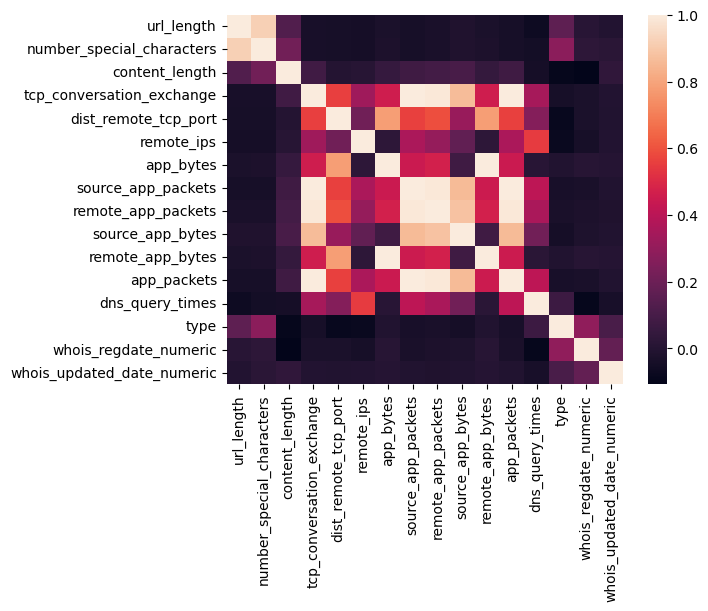

In [25]:
sns.heatmap(correlation_matrix)

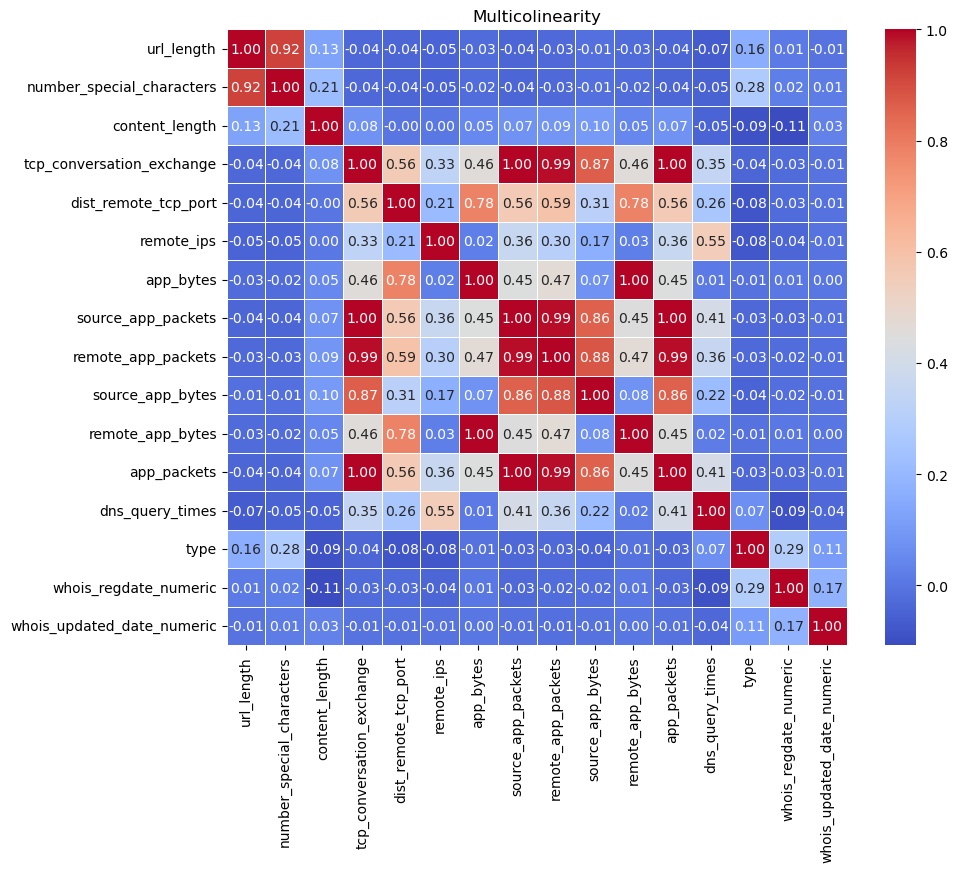

In [26]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Multicolinearity")
plt.show()

In [27]:
# we can observe that the "packets" columns are very correlated, so we decide to keep only 1 column of that type

# also url lenght and number of characters are very similar, we keep 1 of them

In [28]:
websites = websites.drop(columns = ["number_special_characters", "remote_app_packets", "app_packets"])

# Challenge 2 - Remove Column Collinearity.

From the heatmap you created, you should have seen at least 3 columns that can be removed due to high collinearity. Remove these columns from the dataset.

Note that you should remove as few columns as you can. You don't have to remove all the columns at once. But instead, try removing one column, then produce the heatmap again to determine if additional columns should be removed. As long as the dataset no longer contains columns that are correlated for over 90%, you can stop. Also, keep in mind when two columns have high collinearity, you only need to remove one of them but not both.

In the cells below, remove as few columns as you can to eliminate the high collinearity in the dataset. Make sure to comment on your way so that the instructional team can learn about your thinking process which allows them to give feedback. At the end, print the heatmap again.

In [30]:
# Your comment here
# after removing the columns we have to rename the numerical variable to fit in the new heatmap

In [31]:
num2 = websites.select_dtypes(include=["number"])

In [32]:
num2

,url_length,content_length,tcp_conversation_exchange,dist_remote_tcp_port,remote_ips,app_bytes,source_app_packets,source_app_bytes,remote_app_bytes,dns_query_times,type,whois_regdate_numeric,whois_updated_date_numeric
0,16,263.0,7,0,2,700,9,1153,832,2.0,1,1.444501e+09,NaN
1,16,15087.0,17,7,4,1230,17,1265,1230,0.0,0,NaN,NaN
2,16,324.0,0,0,0,0,0,0,0,0.0,0,NaN,NaN
3,17,162.0,31,22,3,3812,39,18784,4380,8.0,0,8.761968e+08,1.378947e+09
4,17,124140.0,57,2,5,4278,61,129889,4586,4.0,0,8.318592e+08,1.491869e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1776,194,NaN,0,0,0,0,0,186,0,0.0,1,1.221610e+09,1.472774e+09
1777,198,NaN,0,0,0,0,0,124,0,0.0,1,1.221610e+09,1.472774e+09
1778,201,8904.0,83,2,6,6631,87,132181,6945,4.0,0,9.190368e+08,1.436918e+09
1779,234,NaN,0,0,0,0,0,0,0,0.0,0,8.913888e+08,1.481242e+09


In [33]:
num2_corr = num2.corr()

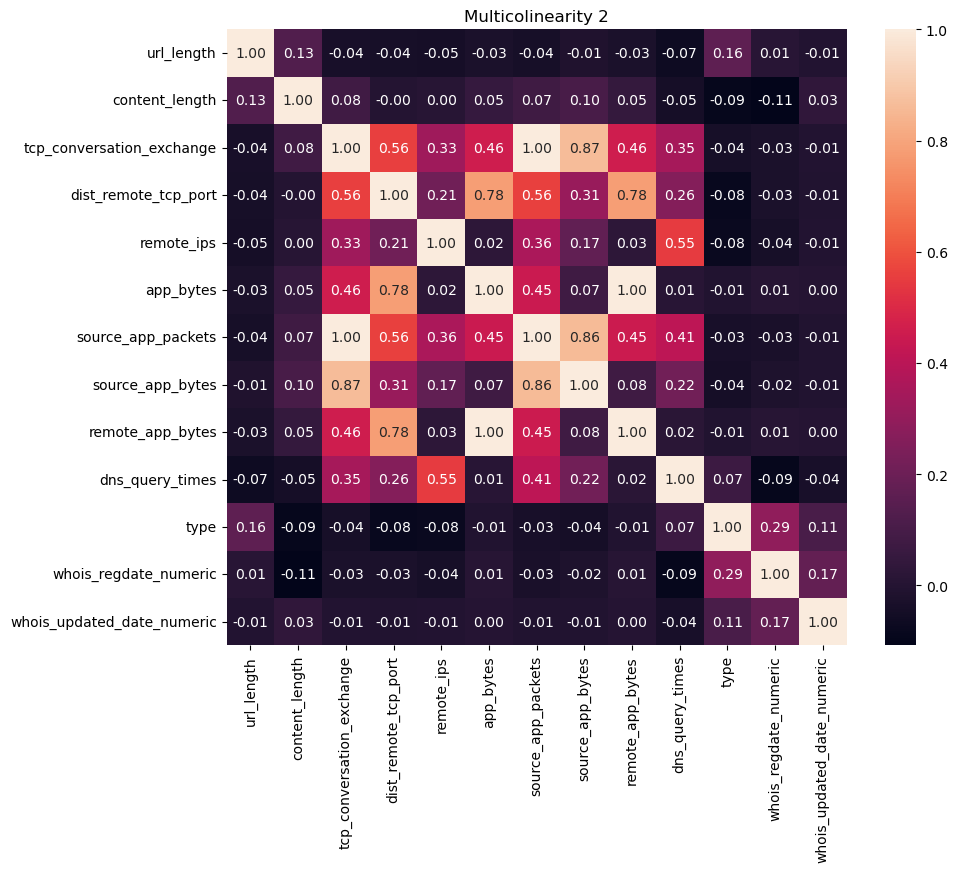

In [34]:
# Print heatmap again
plt.figure(figsize=(10, 8))
sns.heatmap(num2_corr, fmt='.2f', annot=True)
plt.title("Multicolinearity 2")
plt.show()      # All correlations are now below 90%

# Challenge 3 - Handle Missing Values

The next step would be handling missing values. **We start by examining the number of missing values in each column, which you will do in the next cell.**

In [36]:
# Your code here
websites.isnull().sum()

url                             0
url_length                      0
charset                         7
server                        176
content_length                812
whois_country                 306
whois_statepro                362
whois_regdate                 135
whois_updated_date            144
tcp_conversation_exchange       0
dist_remote_tcp_port            0
remote_ips                      0
app_bytes                       0
source_app_packets              0
source_app_bytes                0
remote_app_bytes                0
dns_query_times                 1
type                            0
whois_regdate_numeric         135
whois_updated_date_numeric    144
dtype: int64

In [37]:
# For now we will remove the 2 original columns that we passed to numerical and "content_lenght" because of its lenght

# We can also remove "country" because we have the column "state", whose nans will be removed

If you remember in the previous labs, we drop a column if the column contains a high proportion of missing values. After dropping those problematic columns, we drop the rows with missing values.

#### In the cells below, handle the missing values from the dataset. Remember to comment the rationale of your decisions.

In [39]:
# Your code here
websites

,url,url_length,charset,server,content_length,whois_country,whois_statepro,whois_regdate,whois_updated_date,tcp_conversation_exchange,dist_remote_tcp_port,remote_ips,app_bytes,source_app_packets,source_app_bytes,remote_app_bytes,dns_query_times,type,whois_regdate_numeric,whois_updated_date_numeric
0,M0_109,16,iso-8859-1,nginx,263.0,NaN,NaN,2015-10-10 18:21:00,NaT,7,0,2,700,9,1153,832,2.0,1,1.444501e+09,NaN
1,B0_2314,16,UTF-8,Apache/2.4.10,15087.0,NaN,NaN,NaT,NaT,17,7,4,1230,17,1265,1230,0.0,0,NaN,NaN
2,B0_911,16,us-ascii,Microsoft-HTTPAPI/2.0,324.0,NaN,NaN,NaT,NaT,0,0,0,0,0,0,0,0.0,0,NaN,NaN
3,B0_113,17,ISO-8859-1,nginx,162.0,US,AK,1997-10-07 04:00:00,2013-09-12 00:45:00,31,22,3,3812,39,18784,4380,8.0,0,8.761968e+08,1.378947e+09
4,B0_403,17,UTF-8,NaN,124140.0,US,TX,1996-05-12 00:00:00,2017-04-11 00:00:00,57,2,5,4278,61,129889,4586,4.0,0,8.318592e+08,1.491869e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1776,M4_48,194,UTF-8,Apache,NaN,ES,Barcelona,2008-09-17 00:00:00,2016-09-02 00:00:00,0,0,0,0,0,186,0,0.0,1,1.221610e+09,1.472774e+09
1777,M4_41,198,UTF-8,Apache,NaN,ES,Barcelona,2008-09-17 00:00:00,2016-09-02 00:00:00,0,0,0,0,0,124,0,0.0,1,1.221610e+09,1.472774e+09
1778,B0_162,201,utf-8,Apache/2.2.16 (Debian),8904.0,US,FL,1999-02-15 00:00:00,2015-07-15 00:00:00,83,2,6,6631,87,132181,6945,4.0,0,9.190368e+08,1.436918e+09
1779,B0_1152,234,ISO-8859-1,cloudflare-nginx,NaN,US,CA,1998-04-01 00:00:00,2016-12-09 00:00:00,0,0,0,0,0,0,0,0.0,0,8.913888e+08,1.481242e+09


In [40]:
websites = websites.drop(columns= ["whois_updated_date", "whois_regdate", "content_length", "whois_country"])

In [41]:
websites

,url,url_length,charset,server,whois_statepro,tcp_conversation_exchange,dist_remote_tcp_port,remote_ips,app_bytes,source_app_packets,source_app_bytes,remote_app_bytes,dns_query_times,type,whois_regdate_numeric,whois_updated_date_numeric
0,M0_109,16,iso-8859-1,nginx,NaN,7,0,2,700,9,1153,832,2.0,1,1.444501e+09,NaN
1,B0_2314,16,UTF-8,Apache/2.4.10,NaN,17,7,4,1230,17,1265,1230,0.0,0,NaN,NaN
2,B0_911,16,us-ascii,Microsoft-HTTPAPI/2.0,NaN,0,0,0,0,0,0,0,0.0,0,NaN,NaN
3,B0_113,17,ISO-8859-1,nginx,AK,31,22,3,3812,39,18784,4380,8.0,0,8.761968e+08,1.378947e+09
4,B0_403,17,UTF-8,NaN,TX,57,2,5,4278,61,129889,4586,4.0,0,8.318592e+08,1.491869e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1776,M4_48,194,UTF-8,Apache,Barcelona,0,0,0,0,0,186,0,0.0,1,1.221610e+09,1.472774e+09
1777,M4_41,198,UTF-8,Apache,Barcelona,0,0,0,0,0,124,0,0.0,1,1.221610e+09,1.472774e+09
1778,B0_162,201,utf-8,Apache/2.2.16 (Debian),FL,83,2,6,6631,87,132181,6945,4.0,0,9.190368e+08,1.436918e+09
1779,B0_1152,234,ISO-8859-1,cloudflare-nginx,CA,0,0,0,0,0,0,0,0.0,0,8.913888e+08,1.481242e+09


In [42]:
websites.dropna(axis=0, how="any", inplace=True)

#### Again, examine the number of missing values in each column. 

If all cleaned, proceed. Otherwise, go back and do more cleaning.

In [44]:
# Examine missing values in each column
websites.isnull().sum()

url                           0
url_length                    0
charset                       0
server                        0
whois_statepro                0
tcp_conversation_exchange     0
dist_remote_tcp_port          0
remote_ips                    0
app_bytes                     0
source_app_packets            0
source_app_bytes              0
remote_app_bytes              0
dns_query_times               0
type                          0
whois_regdate_numeric         0
whois_updated_date_numeric    0
dtype: int64

# Challenge 4 - Handle `WHOIS_*` Categorical Data

There are several categorical columns we need to handle. These columns are:

* `URL`
* `CHARSET`
* `SERVER`
* `WHOIS_COUNTRY`
* `WHOIS_STATEPRO`
* `WHOIS_REGDATE`
* `WHOIS_UPDATED_DATE`

How to handle string columns is always case by case. Let's start by working on `WHOIS_COUNTRY`. Your steps are:

1. List out the unique values of `WHOIS_COUNTRY`.
1. Consolidate the country values with consistent country codes. For example, the following values refer to the same country and should use consistent country code:
    * `CY` and `Cyprus`
    * `US` and `us`
    * `SE` and `se`
    * `GB`, `United Kingdom`, and `[u'GB'; u'UK']`

#### In the cells below, fix the country values as intructed above.

In [47]:
# Your code here
# I decided to remove this column

Since we have fixed the country values, can we convert this column to ordinal now?

Not yet. If you reflect on the previous labs how we handle categorical columns, you probably remember we ended up dropping a lot of those columns because there are too many unique values. Too many unique values in a column is not desirable in machine learning because it makes prediction inaccurate. But there are workarounds under certain conditions. One of the fixable conditions is:

#### If a limited number of values account for the majority of data, we can retain these top values and re-label all other rare values.

The `WHOIS_COUNTRY` column happens to be this case. You can verify it by print a bar chart of the `value_counts` in the next cell to verify:

In [49]:
# Your code here
websites["whois_statepro"].nunique()

173

In [50]:
barchart1 = websites["whois_statepro"].value_counts()

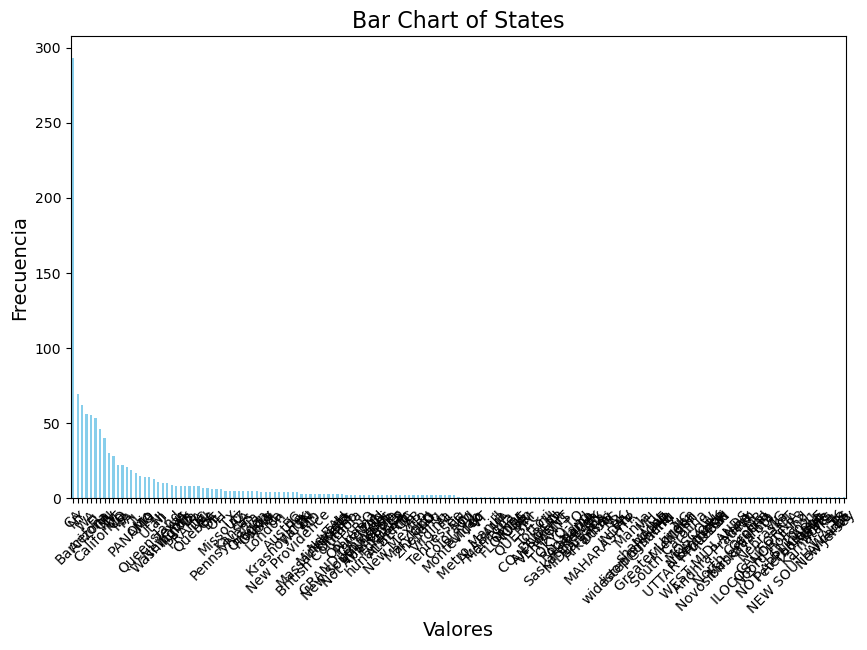

In [51]:
plt.figure(figsize=(10, 6)) 
barchart1.plot(kind='bar', color='skyblue')
plt.title("Bar Chart of States", fontsize=16)
plt.xlabel("Valores", fontsize=14)
plt.ylabel("Frecuencia", fontsize=14)
plt.xticks(rotation=45)
plt.show()

In [52]:
# there are lot of values for the states. I do not know if we could group the states by country and then by continent,
# but this information may be very valuable, to know where the potential attack maybe happen

#### After verifying, now let's keep the top 10 values of the column and re-label other columns with `OTHER`.

In [54]:
# Your code here
top_10_values = websites["whois_statepro"].value_counts().head(10)

In [55]:
websites["whois_statepro"] = websites["whois_statepro"].apply(
    lambda x: x if x in top_10_values else "other")

In [56]:
websites["whois_statepro"].value_counts()

whois_statepro
other         520
CA            293
NY             69
Barcelona      62
WA             56
Arizona        55
FL             53
California     46
ON             40
NV             30
UT             28
Name: count, dtype: int64

Now since `WHOIS_COUNTRY` has been re-labelled, we don't need `WHOIS_STATEPRO` any more because the values of the states or provinces may not be relevant any more. We'll drop this column.

In addition, we will also drop `WHOIS_REGDATE` and `WHOIS_UPDATED_DATE`. These are the registration and update dates of the website domains. Not of our concerns.

#### In the next cell, drop `['WHOIS_STATEPRO', 'WHOIS_REGDATE', 'WHOIS_UPDATED_DATE']`.

In [58]:
# Your code here
websites.drop(columns=["whois_regdate_numeric", "whois_updated_date_numeric"])

,url,url_length,charset,server,whois_statepro,tcp_conversation_exchange,dist_remote_tcp_port,remote_ips,app_bytes,source_app_packets,source_app_bytes,remote_app_bytes,dns_query_times,type
3,B0_113,17,ISO-8859-1,nginx,other,31,22,3,3812,39,18784,4380,8.0,0
5,B0_2064,18,UTF-8,nginx,other,11,6,9,894,11,838,894,0.0,0
6,B0_462,18,iso-8859-1,Apache/2,other,12,0,3,1189,14,8559,1327,2.0,0
7,B0_1128,19,us-ascii,Microsoft-HTTPAPI/2.0,FL,0,0,0,0,0,0,0,0.0,0
10,B0_1013,20,utf-8,Apache,other,0,0,0,0,0,0,0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1776,M4_48,194,UTF-8,Apache,Barcelona,0,0,0,0,0,186,0,0.0,1
1777,M4_41,198,UTF-8,Apache,Barcelona,0,0,0,0,0,124,0,0.0,1
1778,B0_162,201,utf-8,Apache/2.2.16 (Debian),FL,83,2,6,6631,87,132181,6945,4.0,0
1779,B0_1152,234,ISO-8859-1,cloudflare-nginx,CA,0,0,0,0,0,0,0,0.0,0


# Challenge 5 - Handle Remaining Categorical Data & Convert to Ordinal

Now print the `dtypes` of the data again. Besides `WHOIS_COUNTRY` which we already fixed, there should be 3 categorical columns left: `URL`, `CHARSET`, and `SERVER`.

In [60]:
# Your code here
websites.dtypes

url                            object
url_length                      int64
charset                        object
server                         object
whois_statepro                 object
tcp_conversation_exchange       int64
dist_remote_tcp_port            int64
remote_ips                      int64
app_bytes                       int64
source_app_packets              int64
source_app_bytes                int64
remote_app_bytes                int64
dns_query_times               float64
type                            int64
whois_regdate_numeric         float64
whois_updated_date_numeric    float64
dtype: object

#### `URL` is easy. We'll simply drop it because it has too many unique values that there's no way for us to consolidate.

In [62]:
# Your code here
websites.drop(columns="url")

,url_length,charset,server,whois_statepro,tcp_conversation_exchange,dist_remote_tcp_port,remote_ips,app_bytes,source_app_packets,source_app_bytes,remote_app_bytes,dns_query_times,type,whois_regdate_numeric,whois_updated_date_numeric
3,17,ISO-8859-1,nginx,other,31,22,3,3812,39,18784,4380,8.0,0,8.761968e+08,1.378947e+09
5,18,UTF-8,nginx,other,11,6,9,894,11,838,894,0.0,0,1.470235e+09,1.475466e+09
6,18,iso-8859-1,Apache/2,other,12,0,3,1189,14,8559,1327,2.0,0,1.027901e+09,1.467331e+09
7,19,us-ascii,Microsoft-HTTPAPI/2.0,FL,0,0,0,0,0,0,0,0.0,0,8.586432e+08,1.489882e+09
10,20,utf-8,Apache,other,0,0,0,0,0,0,0,0.0,0,1.189728e+09,1.441757e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1776,194,UTF-8,Apache,Barcelona,0,0,0,0,0,186,0,0.0,1,1.221610e+09,1.472774e+09
1777,198,UTF-8,Apache,Barcelona,0,0,0,0,0,124,0,0.0,1,1.221610e+09,1.472774e+09
1778,201,utf-8,Apache/2.2.16 (Debian),FL,83,2,6,6631,87,132181,6945,4.0,0,9.190368e+08,1.436918e+09
1779,234,ISO-8859-1,cloudflare-nginx,CA,0,0,0,0,0,0,0,0.0,0,8.913888e+08,1.481242e+09


#### Print the unique value counts of `CHARSET`. You see there are only a few unique values. So we can keep it as it is.

In [64]:
# Your code here
websites.charset.value_counts()

charset
UTF-8           520
ISO-8859-1      275
utf-8           274
us-ascii         98
iso-8859-1       83
windows-1251      1
windows-1252      1
Name: count, dtype: int64

`SERVER` is a little more complicated. Print its unique values and think about how you can consolidate those values.

#### Before you think of your own solution, don't read the instructions that come next.

In [66]:
# Your code here
websites.server.value_counts()

server
Apache                                                                                311
nginx                                                                                 139
cloudflare-nginx                                                                       80
Microsoft-HTTPAPI/2.0                                                                  76
GSE                                                                                    49
                                                                                     ... 
Apache/2.4.6 (CentOS) OpenSSL/1.0.1e-fips mod_fcgid/2.3.9 PHP/5.4.16 mod_jk/1.2.40      1
mw2114.codfw.wmnet                                                                      1
mw2199.codfw.wmnet                                                                      1
fbs                                                                                     1
Apache/2.2.16 (Debian)                                                                  1
Nam

In [67]:
websites.server.nunique()

193

![Think Hard](../images/think-hard.jpg)

In [69]:
# Your comment here
# the strategy would be to do a top 10 values again as we should not drop the colu,m amd we cannot convert to numerical having all these values

Although there are so many unique values in the `SERVER` column, there are actually only 3 main server types: `Microsoft`, `Apache`, and `nginx`. Just check if each `SERVER` value contains any of those server types and re-label them. For `SERVER` values that don't contain any of those substrings, label with `Other`.

At the end, your `SERVER` column should only contain 4 unique values: `Microsoft`, `Apache`, `nginx`, and `Other`.

In [71]:
# Your code here
servers = ["Microsoft", "Apache", "nginx"]

In [72]:
websites.server = websites.server.apply(lambda x: x if x in servers else "other")

In [73]:
# Count `SERVER` value counts here
websites.server.value_counts()

server
other     802
Apache    311
nginx     139
Name: count, dtype: int64

In [74]:
# now we can convert to numerical, but we lost the microsoft servers as the names are longer. It would be advisable to keep all those servers that contain the word "microsoft"

OK, all our categorical data are fixed now. **Let's convert them to ordinal data using Pandas' `get_dummies` function ([documentation](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html)). Also, assign the data with dummy values to a new variable `website_dummy`.**

In [76]:
# Your code here
website_dummy = pd.get_dummies(websites, prefix=None, prefix_sep='_', dummy_na=False, columns=["url", "charset", "server", "whois_statepro"], sparse=False, drop_first=False, dtype=None)

Now, inspect `website_dummy` to make sure the data and types are intended - there shouldn't be any categorical columns at this point.

In [78]:
# Your code here
website_dummy.nunique()

url_length                   132
tcp_conversation_exchange     97
dist_remote_tcp_port          59
remote_ips                    17
app_bytes                    568
                            ... 
whois_statepro_NY              2
whois_statepro_ON              2
whois_statepro_UT              2
whois_statepro_WA              2
whois_statepro_other           2
Length: 1285, dtype: int64

In [79]:
website_dummy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1252 entries, 3 to 1780
Columns: 1285 entries, url_length to whois_statepro_other
dtypes: bool(1273), float64(3), int64(9)
memory usage: 1.6 MB


# Challenge 6 - Modeling, Prediction, and Evaluation

We'll start off this section by splitting the data to train and test. **Name your 4 variables `X_train`, `X_test`, `y_train`, and `y_test`. Select 80% of the data for training and 20% for testing.**

In [81]:
websites

,url,url_length,charset,server,whois_statepro,tcp_conversation_exchange,dist_remote_tcp_port,remote_ips,app_bytes,source_app_packets,source_app_bytes,remote_app_bytes,dns_query_times,type,whois_regdate_numeric,whois_updated_date_numeric
3,B0_113,17,ISO-8859-1,nginx,other,31,22,3,3812,39,18784,4380,8.0,0,8.761968e+08,1.378947e+09
5,B0_2064,18,UTF-8,nginx,other,11,6,9,894,11,838,894,0.0,0,1.470235e+09,1.475466e+09
6,B0_462,18,iso-8859-1,other,other,12,0,3,1189,14,8559,1327,2.0,0,1.027901e+09,1.467331e+09
7,B0_1128,19,us-ascii,other,FL,0,0,0,0,0,0,0,0.0,0,8.586432e+08,1.489882e+09
10,B0_1013,20,utf-8,Apache,other,0,0,0,0,0,0,0,0.0,0,1.189728e+09,1.441757e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1776,M4_48,194,UTF-8,Apache,Barcelona,0,0,0,0,0,186,0,0.0,1,1.221610e+09,1.472774e+09
1777,M4_41,198,UTF-8,Apache,Barcelona,0,0,0,0,0,124,0,0.0,1,1.221610e+09,1.472774e+09
1778,B0_162,201,utf-8,other,FL,83,2,6,6631,87,132181,6945,4.0,0,9.190368e+08,1.436918e+09
1779,B0_1152,234,ISO-8859-1,other,CA,0,0,0,0,0,0,0,0.0,0,8.913888e+08,1.481242e+09


In [104]:
from sklearn.model_selection import train_test_split
X = website_dummy.drop(columns = "type")
y = website_dummy["type"] # por qué no puedo poner aquí la variable ya definida: target = websites["type"]

# Your code here:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [83]:
print(websites.columns)


Index(['url', 'url_length', 'charset', 'server', 'whois_statepro',
       'tcp_conversation_exchange', 'dist_remote_tcp_port', 'remote_ips',
       'app_bytes', 'source_app_packets', 'source_app_bytes',
       'remote_app_bytes', 'dns_query_times', 'type', 'whois_regdate_numeric',
       'whois_updated_date_numeric'],
      dtype='object')


#### In this lab, we will try two different models and compare our results.

The first model we will use in this lab is logistic regression. We have previously learned about logistic regression as a classification algorithm. In the cell below, load `LogisticRegression` from scikit-learn and initialize the model.

In [95]:
# Your code here:
from sklearn.linear_model import LogisticRegression

Next, fit the model to our training data. We have already separated our data into 4 parts. Use those in your model.

In [106]:
# Your code here:
model = LogisticRegression()
model.fit(X_train, y_train)


LogisticRegression()

In [108]:
# Verifica los tipos de las columnas en X_train
print(X_train.dtypes)

url_length                   int64
tcp_conversation_exchange    int64
dist_remote_tcp_port         int64
remote_ips                   int64
app_bytes                    int64
                             ...  
whois_statepro_NY             bool
whois_statepro_ON             bool
whois_statepro_UT             bool
whois_statepro_WA             bool
whois_statepro_other          bool
Length: 1284, dtype: object


finally, import `confusion_matrix` and `accuracy_score` from `sklearn.metrics` and fit our testing data. Assign the fitted data to `y_pred` and print the confusion matrix as well as the accuracy score

In [110]:
# Your code here:
from sklearn.metrics import confusion_matrix, accuracy_score

In [112]:
y_pred = model.predict(X_test)

In [114]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [118]:
confusion_matrix(y_test, y_pred)

array([[217,   8],
       [ 25,   1]], dtype=int64)

In [120]:
accuracy_score(y_test, y_pred)

0.8685258964143426

What are your thoughts on the performance of the model? Write your conclusions below.

In [ ]:
# Your conclusions here:
# an accuracy of 0.86 means that the model predicted 86 % as the original model
# in the confusion matrix we can see 8 "mistakes" for predictions for 0 and 1 mistake for prediction for 1


#### Our second algorithm is is K-Nearest Neighbors. 

Though is it not required, we will fit a model using the training data and then test the performance of the model using the testing data. Start by loading `KNeighborsClassifier` from scikit-learn and then initializing and fitting the model. We'll start off with a model where k=3.

In [122]:
# Your code here:
from sklearn.neighbors import KNeighborsClassifier


In [124]:
knn_model = KNeighborsClassifier(n_neighbors=3)

In [128]:
knn_model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [130]:
y_pred = knn_model.predict(X_test)

In [132]:
y_pred

array([0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0], dtype=int64)

To test your model, compute the predicted values for the testing sample and print the confusion matrix as well as the accuracy score.

In [138]:
# Your code here:
accuracy_score(y_test, y_pred)

0.9681274900398407

In [136]:
confusion_matrix(y_test, y_pred)

array([[222,   3],
       [  5,  21]], dtype=int64)

#### We'll create another K-Nearest Neighbors model with k=5. 

Initialize and fit the model below and print the confusion matrix and the accuracy score.

In [148]:
# Your code here:
knn_model2 = KNeighborsClassifier(n_neighbors=5)

In [152]:
knn_model2.fit(X_train, y_train)

KNeighborsClassifier()

In [154]:
y_pred2 = knn_model.predict(X_test)

In [156]:
accuracy_score(y_test, y_pred)

0.9681274900398407

In [158]:
confusion_matrix(y_test, y_pred)

array([[222,   3],
       [  5,  21]], dtype=int64)

Did you see an improvement in the confusion matrix when increasing k to 5? Did you see an improvement in the accuracy score? Write your conclusions below.

In [ ]:
# Your conclusions here:

# the result is the same

# this may occur because it is based on proximity, and if the data is well organized, no change happens. outliers impact here??

# Bonus Challenge - Feature Scaling

Problem-solving in machine learning is iterative. You can improve your model prediction with various techniques (there is a sweetspot for the time you spend and the improvement you receive though). Now you've completed only one iteration of ML analysis. There are more iterations you can conduct to make improvements. In order to be able to do that, you will need deeper knowledge in statistics and master more data analysis techniques. In this bootcamp, we don't have time to achieve that advanced goal. But you will make constant efforts after the bootcamp to eventually get there.

However, now we do want you to learn one of the advanced techniques which is called *feature scaling*. The idea of feature scaling is to standardize/normalize the range of independent variables or features of the data. This can make the outliers more apparent so that you can remove them. This step needs to happen during Challenge 6 after you split the training and test data because you don't want to split the data again which makes it impossible to compare your results with and without feature scaling. For general concepts about feature scaling, click [here](https://en.wikipedia.org/wiki/Feature_scaling). To read deeper, click [here](https://medium.com/greyatom/why-how-and-when-to-scale-your-features-4b30ab09db5e).

In the next cell, attempt to improve your model prediction accuracy by means of feature scaling. A library you can utilize is `sklearn.preprocessing.RobustScaler` ([documentation](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.RobustScaler.html)). You'll use the `RobustScaler` to fit and transform your `X_train`, then transform `X_test`. You will use logistic regression to fit and predict your transformed data and obtain the accuracy score in the same way. Compare the accuracy score with your normalized data with the previous accuracy data. Is there an improvement?

In [ ]:
# Your code here